<a href="https://colab.research.google.com/github/jibbsmathew/BritishAirways_DataScienceProject/blob/main/BritishAirlines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df

,reviews
0,✅ Trip Verified | First time using BA busines...
1,Not Verified | Extremely rude ground service....
2,✅ Trip Verified | My son and I flew to Geneva...
3,✅ Trip Verified | For the price paid (bought ...
4,✅ Trip Verified | Flight left on time and arr...
...,...
995,✅ Trip Verified | London to Athens. Classic B...
996,✅ Trip Verified | I booked a British Airways ...
997,✅ Trip Verified | Flying premium economy on B...
998,✅ Trip Verified | Tokyo to London. I was look...


In [4]:
df.to_csv("BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

WORD CLOUD

In [5]:
!pip install pandas matplotlib wordcloud

In [6]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [7]:
text = ' '.join(df['reviews'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

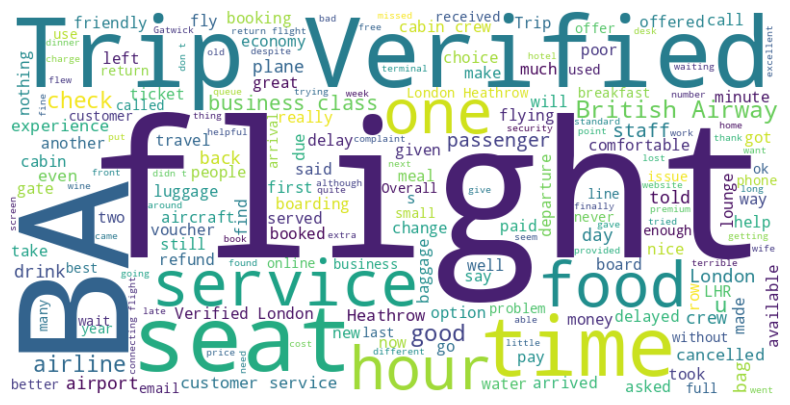

In [8]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [9]:
# Save the word cloud to an image file (e.g., 'wordcloud.png')
wordcloud.to_file("wordcloud.png")

TOPIC MODELLING

In [10]:
!pip install pandas gensim nltk

In [11]:
from nltk.corpus import stopwords
from gensim import corpora, models

In [12]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [13]:
stop_words = set(stopwords.words('english'))
df['reviews'] = df['reviews'].apply(lambda x: [word for word in x.lower().split() if word not in stop_words])

In [14]:
dictionary = corpora.Dictionary(df['reviews'])

corpus = [dictionary.doc2bow(doc) for doc in df['reviews']]

In [15]:
lda_model = models.LdaModel(corpus, num_topics=10, id2word=dictionary, passes=15)


In [16]:
for topic, words in lda_model.print_topics():
    print(f"Topic {topic}: {words}\n")


Topic 0: 0.017*"flight" + 0.012*"ba" + 0.011*"verified" + 0.011*"|" + 0.011*"trip" + 0.009*"✅" + 0.008*"staff" + 0.007*"business" + 0.006*"class" + 0.006*"service"

Topic 1: 0.006*"flight" + 0.005*"|" + 0.005*"verified" + 0.004*"✅" + 0.004*"trip" + 0.004*"ba" + 0.003*"business" + 0.003*"service" + 0.003*"another" + 0.002*"last"

Topic 2: 0.016*"flight" + 0.012*"ba" + 0.011*"verified" + 0.011*"|" + 0.009*"trip" + 0.009*"✅" + 0.006*"food" + 0.006*"business" + 0.005*"good" + 0.005*"service"

Topic 3: 0.022*"flight" + 0.011*"ba" + 0.010*"verified" + 0.010*"|" + 0.008*"trip" + 0.008*"british" + 0.008*"get" + 0.007*"hours" + 0.007*"airways" + 0.007*"✅"

Topic 4: 0.010*"flight" + 0.010*"verified" + 0.010*"|" + 0.009*"trip" + 0.008*"✅" + 0.007*"service" + 0.007*"ba" + 0.006*"check" + 0.006*"customer" + 0.005*"british"

Topic 5: 0.013*"flight" + 0.013*"ba" + 0.011*"verified" + 0.011*"|" + 0.010*"trip" + 0.009*"✅" + 0.006*"service" + 0.005*"london" + 0.005*"british" + 0.004*"crew"

Topic 6: 0.01

In [17]:
df['topic'] = df['reviews'].apply(lambda x: lda_model.get_document_topics(dictionary.doc2bow(x))[0][0])


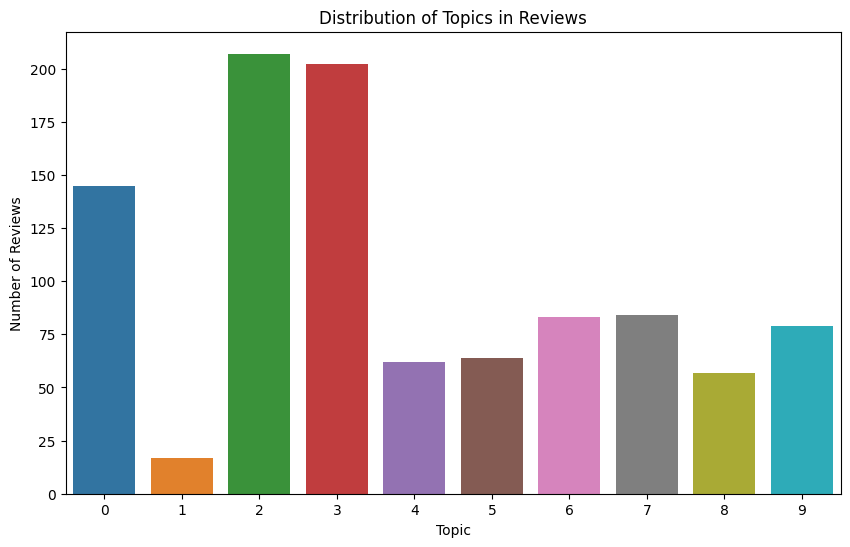

In [18]:
import seaborn as sns

topic_counts = df['topic'].value_counts().reset_index()
topic_counts.columns = ['Topic', 'Count']

plt.figure(figsize=(10, 6))
sns.barplot(x='Topic', y='Count', data=topic_counts)
plt.title("Distribution of Topics in Reviews")
plt.xlabel("Topic")
plt.ylabel("Number of Reviews")
plt.show()


SENTIMENT ANALYSIS

In [19]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [20]:
 analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    text = ' '.join(text)

    sentiment_scores = analyzer.polarity_scores(text)
    compound_score = sentiment_scores['compound']
    sentiment_label = 'positive' if compound_score >= 0.05 else 'negative' if compound_score <= -0.05 else 'neutral'
    return sentiment_scores, sentiment_label

df['sentiment_scores'], df['sentiment_label'] = zip(*df['reviews'].apply(get_sentiment))

print(df)

                                               reviews  topic  \
0    [✅, trip, verified, |, first, time, using, ba,...      6   
1    [verified, |, extremely, rude, ground, service...      9   
2    [✅, trip, verified, |, son, flew, geneva, last...      3   
3    [✅, trip, verified, |, price, paid, (bought, s...      7   
4    [✅, trip, verified, |, flight, left, time, arr...      9   
..                                                 ...    ...   
995  [✅, trip, verified, |, london, athens., classi...      0   
996  [✅, trip, verified, |, booked, british, airway...      2   
997  [✅, trip, verified, |, flying, premium, econom...      9   
998  [✅, trip, verified, |, tokyo, london., looking...      7   
999  [✅, trip, verified, |, london, tokyo, haneda.,...      2   

                                      sentiment_scores sentiment_label  
0    {'neg': 0.052, 'neu': 0.733, 'pos': 0.216, 'co...        positive  
1    {'neg': 0.149, 'neu': 0.621, 'pos': 0.23, 'com...        positive  


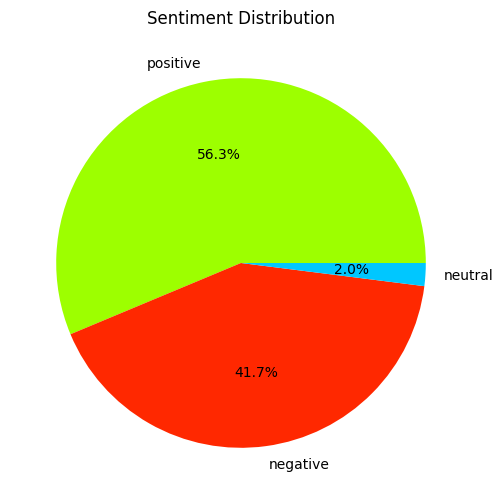

In [21]:
sentiment_counts = df['sentiment_label'].value_counts()

colors = ['#9dff00','#ff2800', '#00c7ff']

plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, colors=colors, autopct='%1.1f%%')
plt.title("Sentiment Distribution")

plt.show()

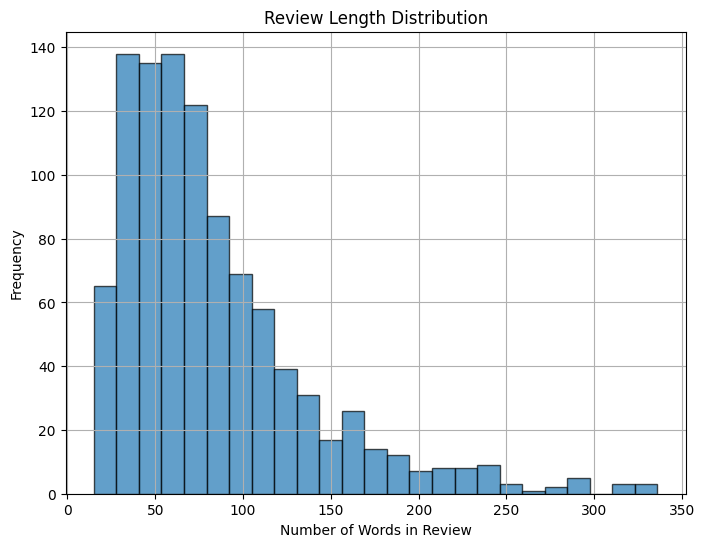

In [24]:
import matplotlib.pyplot as plt

# Assuming 'reviews' is the column containing text data
df['reviews'] = df['reviews'].fillna('').astype(str)

# Compute review lengths
review_lengths = df['reviews'].str.split().map(len)

# Plotting the histogram
plt.figure(figsize=(8, 6))
plt.hist(review_lengths, bins=25, edgecolor='black', alpha=0.7)
plt.title('Review Length Distribution')
plt.xlabel('Number of Words in Review')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [27]:
!pip install textstat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 33.2 MB/s eta 0:00:00


In [35]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [39]:
import pandas as pd
import nltk
from nltk import pos_tag, ne_chunk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.tokenize import RegexpTokenizer
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.util import ngrams
from sklearn.feature_extraction.text import TfidfVectorizer
from textstat import flesch_reading_ease

# Load your data into a DataFrame
# Assuming 'reviews' is the column containing text data
# Replace 'reviews' with the actual column name in your DataFrame
# df = pd.read_csv('your_data.csv')


nltk.download('maxent_ne_chunker')
nltk.download('words')


[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


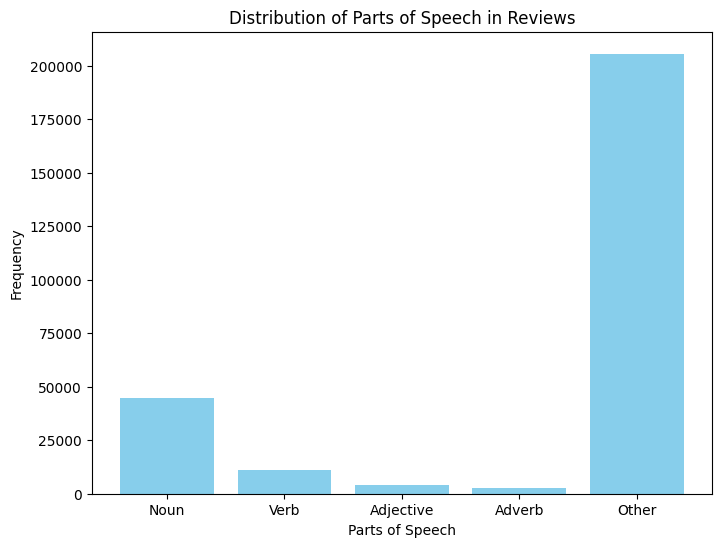

In [37]:
import pandas as pd
import nltk
from nltk import pos_tag
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

# Assuming 'reviews' is the column containing text data
# Replace 'reviews' with the actual column name in your DataFrame
# df = pd.read_csv('your_data.csv')

nltk.download('averaged_perceptron_tagger')

# POS tagging for all reviews
pos_counts = {'Noun': 0, 'Verb': 0, 'Adjective': 0, 'Adverb': 0, 'Other': 0}

for review in df['reviews']:
    words = word_tokenize(review)
    pos_tags = pos_tag(words)
    for word, tag in pos_tags:
        if tag.startswith('N'):
            pos_counts['Noun'] += 1
        elif tag.startswith('V'):
            pos_counts['Verb'] += 1
        elif tag.startswith('J'):
            pos_counts['Adjective'] += 1
        elif tag.startswith('R'):
            pos_counts['Adverb'] += 1
        else:
            pos_counts['Other'] += 1

# Plotting the POS distribution
plt.figure(figsize=(8, 6))
plt.bar(pos_counts.keys(), pos_counts.values(), color='skyblue')
plt.xlabel('Parts of Speech')
plt.ylabel('Frequency')
plt.title('Distribution of Parts of Speech in Reviews')
plt.show()


<ipython-input-45-df542824f26a>:26: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(scalarmappable)


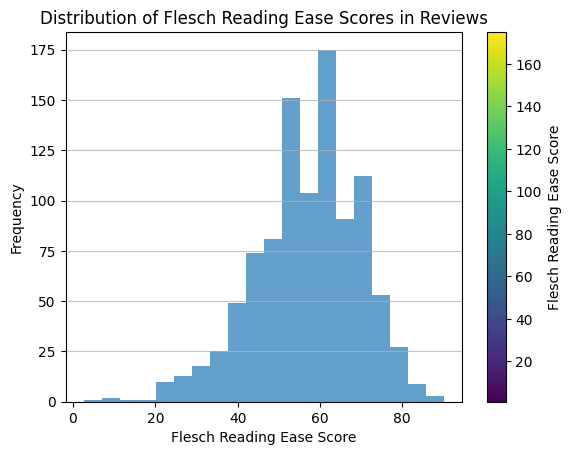

In [45]:
import pandas as pd
from textstat import flesch_reading_ease
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'reviews' is the column containing text data
# Replace 'reviews' with the actual column name in your DataFrame
# df = pd.read_csv('your_data.csv')

# Calculate Flesch Reading Ease scores for each review
flesch_scores = [flesch_reading_ease(review) for review in df['reviews']]

# Define the number of bins for the histogram
num_bins = 20

# Create bins and assign colors to each bar based on Flesch Reading Ease scores
bin_values, _, _ = plt.hist(flesch_scores, bins=num_bins, alpha=0.7)

# Create a colormap and normalize based on the number of bins
norm = plt.Normalize(bin_values.min(), bin_values.max())
colors = plt.cm.viridis(norm(bin_values))

# Create a colorbar to show the range of Flesch Reading Ease scores
scalarmappable = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
scalarmappable.set_array([])
cbar = plt.colorbar(scalarmappable)
cbar.set_label('Flesch Reading Ease Score')

# Show the histogram with colored bars
plt.xlabel('Flesch Reading Ease Score')
plt.ylabel('Frequency')
plt.title('Distribution of Flesch Reading Ease Scores in Reviews')
plt.grid(axis='y', alpha=0.75)
plt.show()
